In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = np.linspace(0,5,31,endpoint=True) # hours
a = 0.30 # counts
a1 = 0.02
a2 = 0.3
a3 = 0.075
abest = 0.20
l = 40/60   # hours
l1 = 40/60
l2 = 20/60
l3 = 2
lbest = 50/60
sig = 0.02 # counts

In [3]:
C = np.zeros((len(x),len(x)))
C1 = np.zeros((len(x),len(x)))
C2 = np.zeros((len(x),len(x)))
C3 = np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        if i==j:
            C[i,j] = sig**2 + a**2
            C1[i,j] = sig**2 + a1**2
            C2[i,j] = sig**2 + a2**2
            C3[i,j] = sig**2 + a3**2
        else:
            C[i,j] = a**2*np.exp(-(x[i]-x[j])**2/(2*l**2))
            C1[i,j] = a1**2*np.exp(-(x[i]-x[j])**2/(2*l1**2))
            C2[i,j] = a2**2*np.exp(-(x[i]-x[j])**2/(2*l2**2))
            C3[i,j] = a3**2*np.exp(-(x[i]-x[j])**2/(2*l3**2))

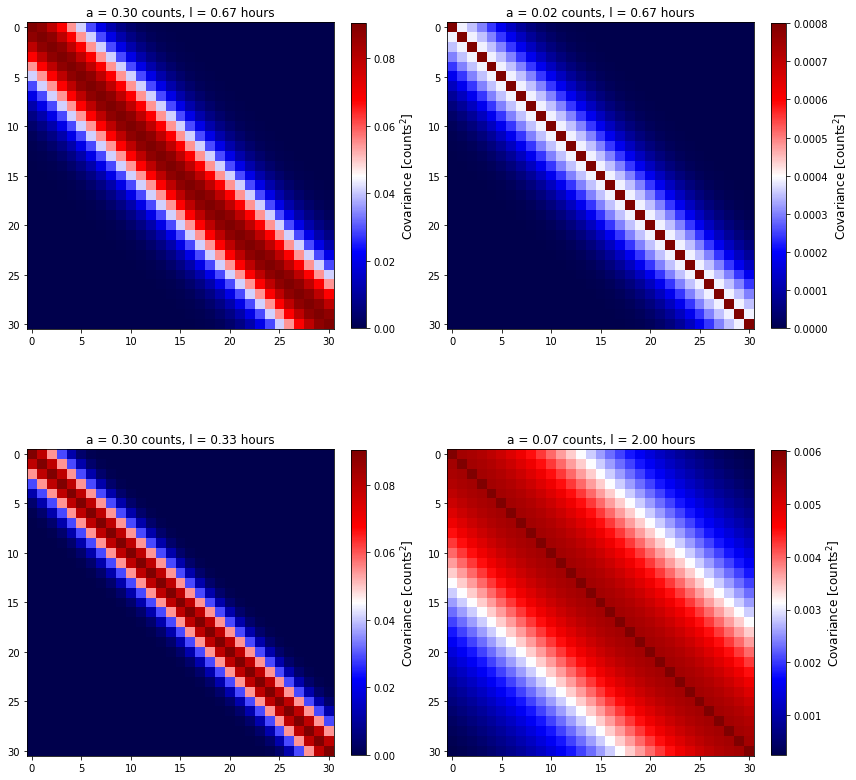

In [4]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('a = {:3.2f} counts, l = {:3.2f} hours'.format(a,l))
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('a = {:3.2f} counts, l = {:3.2f} hours'.format(a1,l1))
ax3 = fig.add_subplot(2,2,3)
ax3.set_title('a = {:3.2f} counts, l = {:3.2f} hours'.format(a2,l2))
ax4 = fig.add_subplot(2,2,4)
ax4.set_title('a = {:3.2f} counts, l = {:3.2f} hours'.format(a3,l3))

cax1 = ax1.imshow(C, cmap='seismic', origin='upper')
cbar1 = fig.colorbar(cax1, ax=ax1, fraction=0.045)
cbar1.set_label(r'Covariance [counts$^2$]', fontsize=12)
cax2 = ax2.imshow(C1, cmap='seismic', origin='upper')
cbar2 = fig.colorbar(cax2, ax=ax2, fraction=0.045)
cbar2.set_label(r'Covariance [counts$^2$]', fontsize=12)
cax3 = ax3.imshow(C2, cmap='seismic', origin='upper')
cbar3 = fig.colorbar(cax3, ax=ax3, fraction=0.045)
cbar3.set_label(r'Covariance [counts$^2$]', fontsize=12)
cax4 = ax4.imshow(C3, cmap='seismic', origin='upper')
cbar4 = fig.colorbar(cax4, ax=ax4, fraction=0.045)
cbar4.set_label(r'Covariance [counts$^2$]', fontsize=12)

plt.tight_layout()
fig.savefig('Problem2a.pdf')
plt.show()

In [5]:
pdfs = np.zeros((20,len(x)))
for i in range(pdfs.shape[0]):
    if i<5:
        pdfs[i] = np.random.multivariate_normal(np.ones(len(x)), C)
    elif 5<=i<10:
        pdfs[i] = np.random.multivariate_normal(np.ones(len(x)), C1)
    elif 10<=i<15:
        pdfs[i] = np.random.multivariate_normal(np.ones(len(x)), C2)
    else:
        pdfs[i] = np.random.multivariate_normal(np.ones(len(x)), C3)

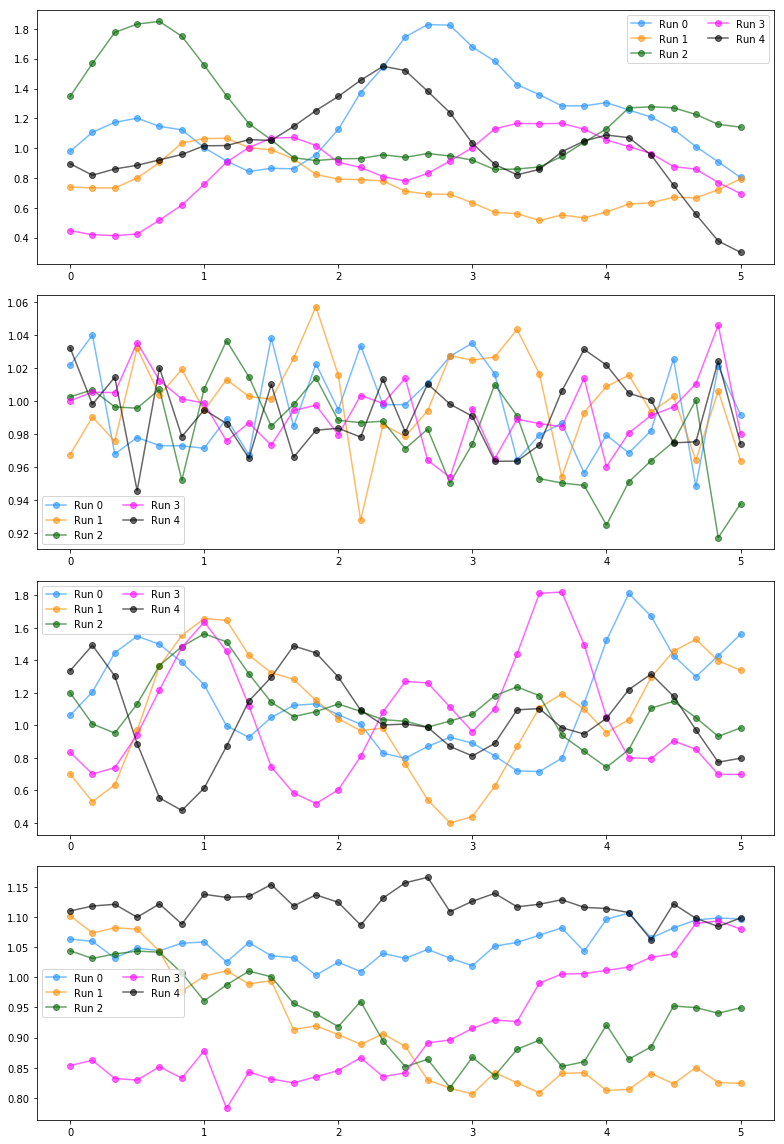

In [7]:
colors = ['dodgerblue','darkorange','darkgreen','magenta','k']
fig = plt.figure(figsize=(11,16))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
#ax4.set_xlabel('Time [days]', fontsize=12)
#ax2.set_ylabel('Normalized Flux', fontsize=12)

for i in range(pdfs.shape[0]):
    if i<5:
        ax1.plot(x,pdfs[i],marker='o',color=colors[np.mod(i,5)],alpha=0.6,label='Run {:d}'.format(np.mod(i,5)))
    elif 5<=i<10:
        ax2.plot(x,pdfs[i],marker='o',color=colors[np.mod(i,5)],alpha=0.6,label='Run {:d}'.format(np.mod(i,5)))
    elif 10<=i<15:
        ax3.plot(x,pdfs[i],marker='o',color=colors[np.mod(i,5)],alpha=0.6,label='Run {:d}'.format(np.mod(i,5)))
    else:
        ax4.plot(x,pdfs[i],marker='o',color=colors[np.mod(i,5)],alpha=0.6,label='Run {:d}'.format(np.mod(i,5)))
        
ax1.legend(ncol=2)
ax2.legend(ncol=2)
ax3.legend(ncol=2)
ax4.legend(ncol=2)

plt.tight_layout()
fig.savefig('Problem2b.pdf')
plt.show()

In [53]:
fL = np.array([1.21,1.42,1.09,0.93,0.99])
xL = np.array([25,120,187,230,287])/60
sigL = 0.08

Kxsxs = np.zeros((len(x),len(x)))
Kxsx = np.zeros((len(x),len(xL)))
Kxxs = np.zeros((len(xL),len(x)))
Kxx = np.zeros((len(xL),len(xL)))

for i in range(len(x)):
    for j in range(len(x)):
        Kxsxs[i,j] = abest**2*np.exp(-(x[i]-x[j])**2/lbest**2)
for i in range(len(x)):
    for j in range(len(xL)):
        Kxsx[i,j] = abest**2*np.exp(-(xL[j]-x[i])**2/lbest**2)
        Kxxs[j,i] = abest**2*np.exp(-(x[i]-xL[j])**2/lbest**2)
for i in range(len(xL)):
    for j in range(len(xL)):
        Kxx[i,j] = abest**2*np.exp(-(xL[i]-xL[j])**2/lbest**2)
        
covfs = Kxsxs + np.eye(Kxsxs.shape[0])*sig**2 - np.dot(Kxsx,np.dot(np.linalg.inv(Kxx+np.eye(Kxx.shape[0])*sigL**2),Kxxs))
fsm = np.ones(len(x)) + np.dot(Kxsx,np.dot(np.linalg.inv(Kxx+np.eye(Kxx.shape[0])*sigL**2),fL-np.ones(len(fL))))

In [55]:
pdfs = np.zeros((1000,len(x)))
for i in range(pdfs.shape[0]):
    pdfs[i] = np.random.multivariate_normal(fsm,covfs)
    
sigfs = np.zeros(len(x))
for i in range(len(sigfs)):
    sigfs[i] = np.sqrt(((pdfs[:,i]-pdfs[:,i].mean())**2).sum()/(pdfs.shape[0]-1))
fsmean = pdfs.mean(axis=0)

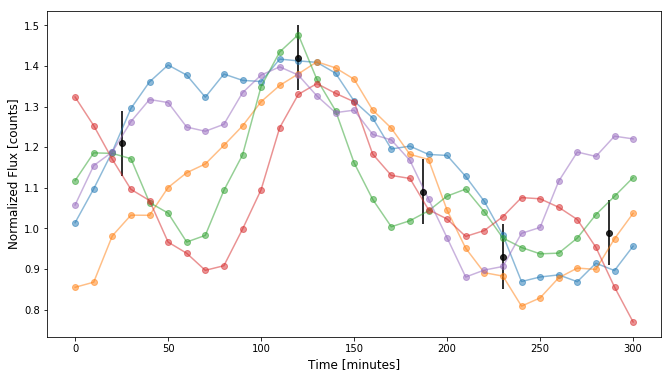

In [62]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Time [minutes]', fontsize=12)
ax.set_ylabel('Normalized Flux [counts]', fontsize=12)

ax.errorbar(xL*60,fL,yerr=sigL,fmt='ok',elinewidth=2,alpha=0.8,label='Data')
for i in range(5):
    ax.plot(x*60,pdfs[i],marker='o',alpha=0.5)
#ax.plot(x*60,fsmean,color='grey',alpha=0.8)
#ax.plot(x*60,fsmean+sigfs,color='grey',alpha=0.4)
#ax.plot(x*60,fsmean-sigfs,color='grey',alpha=0.4)
#ax.fill_between(x*60,fsmean-sigfs,fsmean+sigfs,color='grey',alpha=0.4)
fig.savefig('Problem5.pdf')
plt.show()

In [70]:
key = np.where(np.abs(x-200/60)<0.01)
print(fsmean[key])
print(sigfs[key])

[1.02197139]
[0.07857732]


In [71]:
sigfs

array([0.13716443, 0.10378451, 0.07890423, 0.08057686, 0.10724628,
       0.13550215, 0.15613766, 0.1651477 , 0.16265828, 0.14801321,
       0.12037067, 0.09306643, 0.07994269, 0.0933905 , 0.1154289 ,
       0.12594583, 0.11968712, 0.1015752 , 0.080927  , 0.07383479,
       0.07857732, 0.08157154, 0.07722878, 0.07450692, 0.08341956,
       0.09786419, 0.10351895, 0.09701858, 0.08120476, 0.07777679,
       0.09882441])